In [1]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

quakes = pd.read_csv('earthquakes.csv')

<AxesSubplot:xlabel='magType', ylabel='mag'>

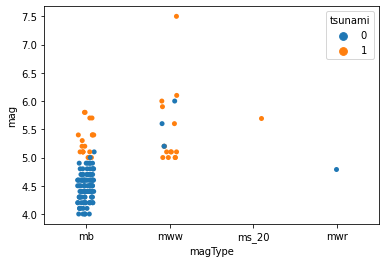

In [3]:
sns.stripplot(x='magType', y='mag', hue='tsunami', data=quakes.query('parsed_place == "Indonesia"'))

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='magType', ylabel='mag'>

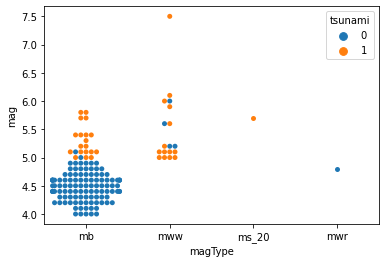

In [6]:
sns.swarmplot(x='magType', y='mag', hue='tsunami', data=quakes.query('parsed_place == "Indonesia"'), size=5)

Text(0.5, 1.0, 'Comparing Earthquake Magnitude by magType')

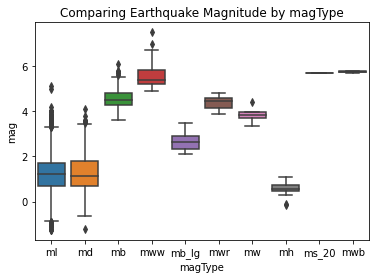

In [7]:
sns.boxplot(x='magType', y='mag', data=quakes[['magType', 'mag']])
plt.title('Comparing Earthquake Magnitude by magType')

Text(0.5, 1.0, 'Comparing Earthquake Magnitude by magType')

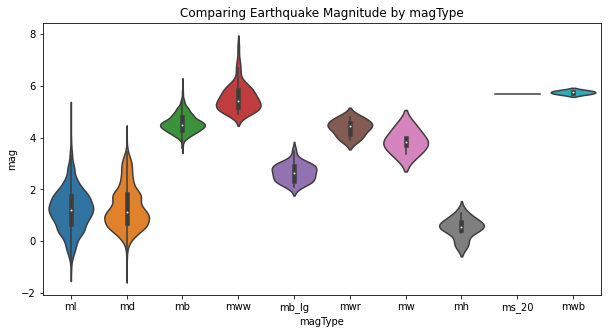

In [8]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.violinplot(x='magType', y='mag', data=quakes[['magType', 'mag']], ax=axes, scale='width')
plt.title("Comparing Earthquake Magnitude by magType")

<AxesSubplot:>

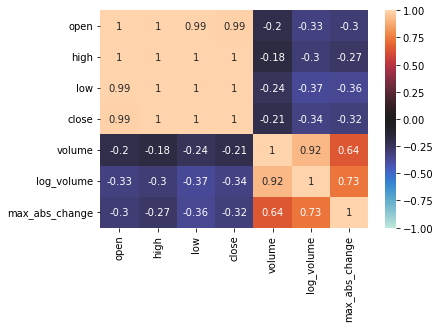

In [10]:
sns.heatmap(fb.sort_index().assign(log_volume=np.log(fb.volume), max_abs_change=fb.high - fb.low).corr(), annot=True, center=0, vmin=-1, vmax=1)

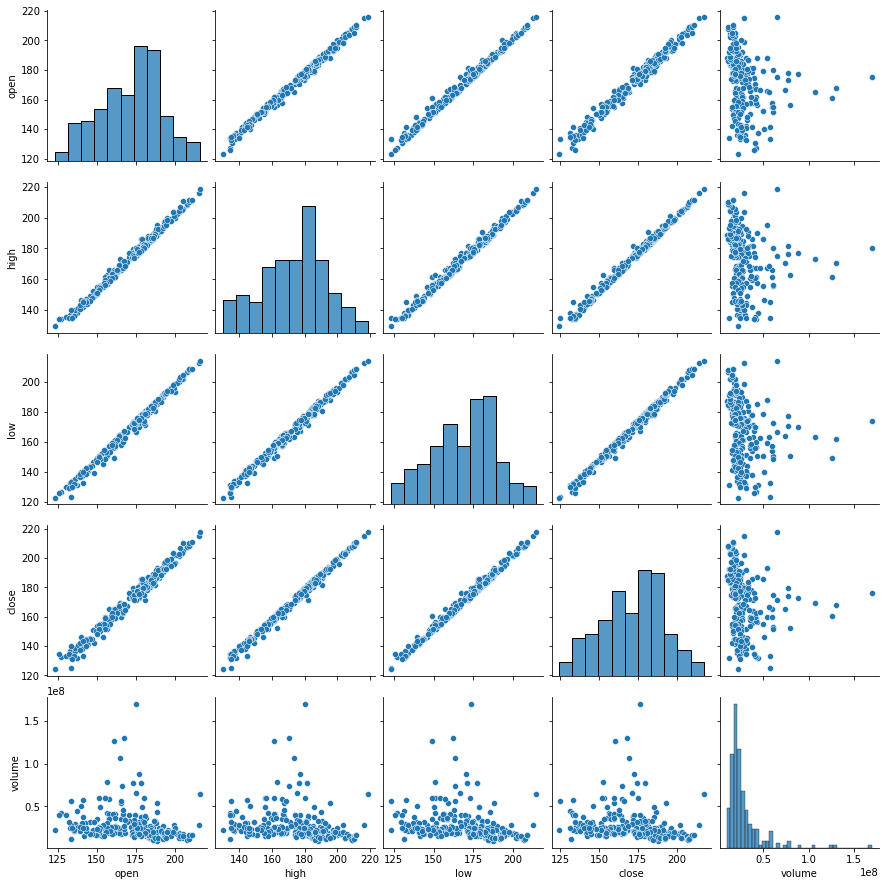

In [11]:
sns.pairplot(fb)

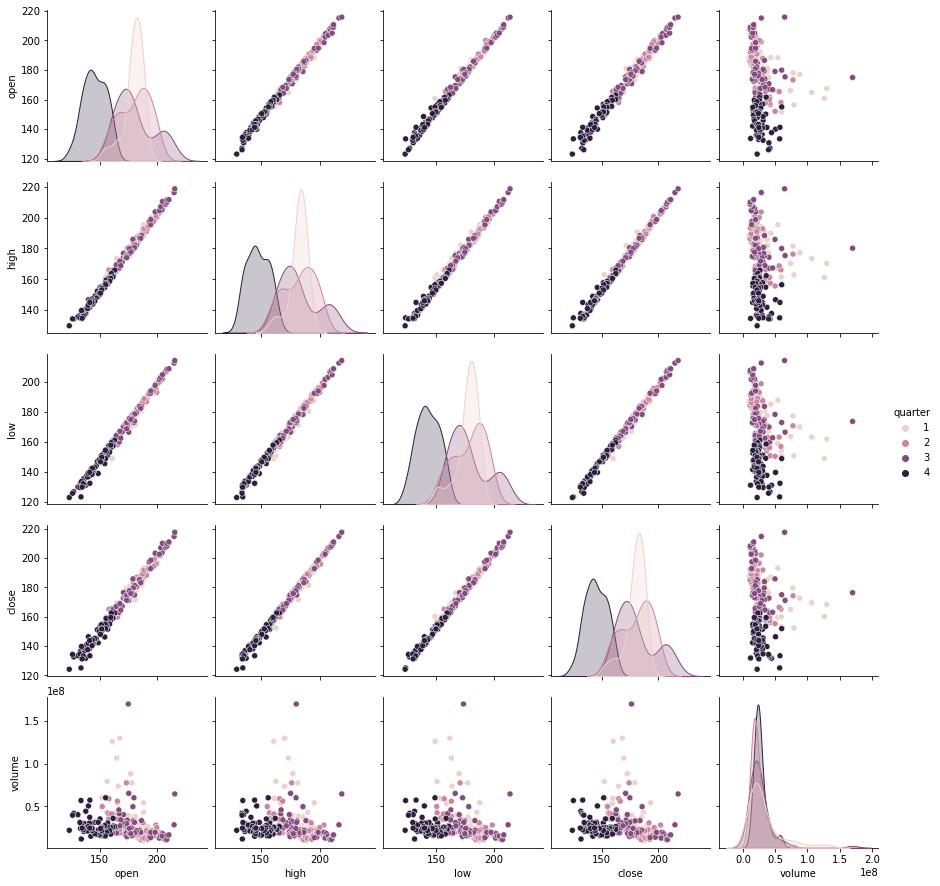

In [15]:
sns.pairplot(fb.assign(quarter=lambda x: x.index.quarter), diag_kind='kde', hue='quarter')

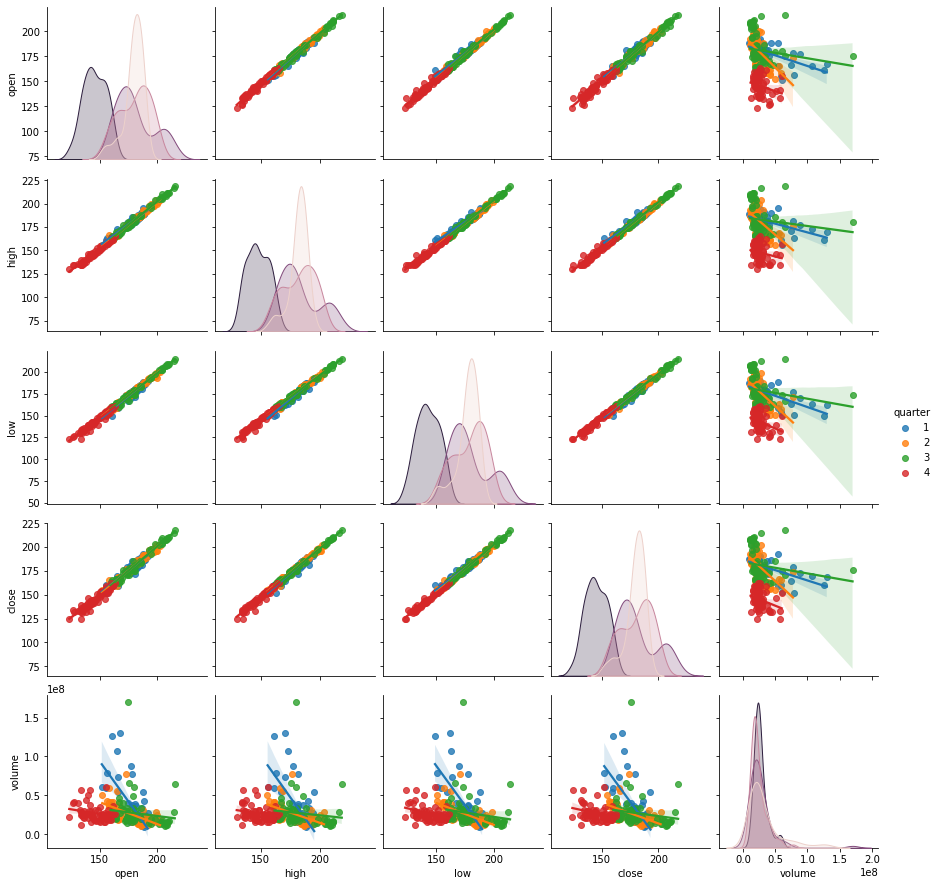

In [14]:
sns.pairplot(fb.assign(quarter=lambda x: x.index.quarter), diag_kind='kde', hue='quarter', kind='reg')

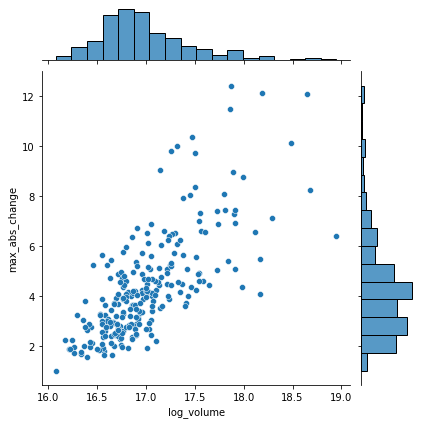

In [17]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change',
    data=fb.assign(
        log_volume=np.log(fb.volume), 
        max_abs_change=fb.high - fb.low)
)

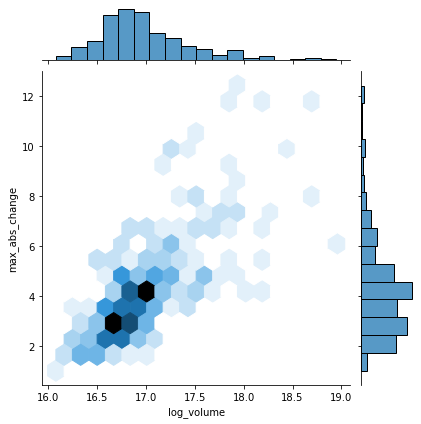

In [18]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change', 
    kind='hex',
    data=fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

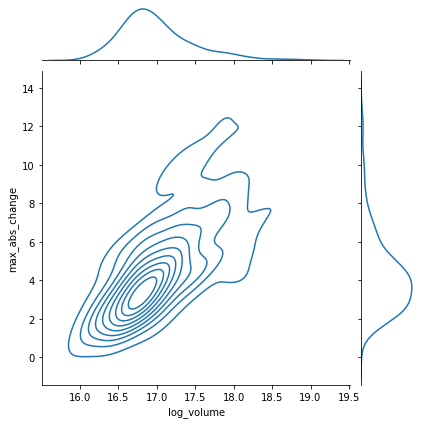

In [19]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change', 
    kind='kde',
    data=fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

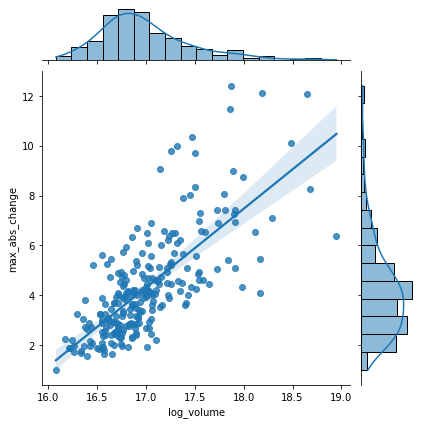

In [20]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change', 
    kind='reg',
    data=fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

Text(333.4714285714286, 0.5, 'residuals')

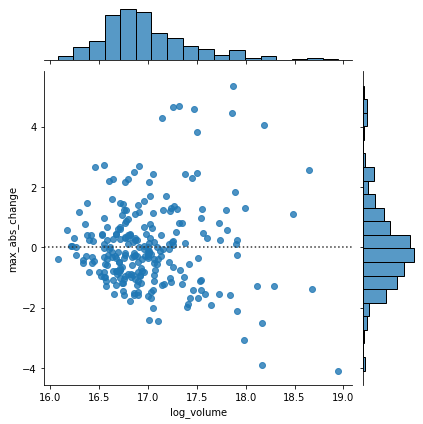

In [21]:
sns.jointplot(
    x='log_volume',
    y='max_abs_change', 
    kind='resid',
    data=fb.assign(
        log_volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)
plt.ylabel('residuals')

In [23]:
fb_reg_data = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change = fb.high - fb.low
).iloc[:, -2:]

In [24]:
import itertools

In [29]:
iterator = itertools.repeat("I'm an iterator", 1)

In [30]:
for i in iterator:
    print(f'-->{i}')

print("This printed once because the iterator has been exhaused.")


-->I'm an iterator
This printed once because the iterator has been exhaused.


In [32]:
iterable = list(itertools.repeat("Im an iteraable", 5))

for i in iterable:
    print(f' --> {i}')

 --> Im an iteraable
 --> Im an iteraable
 --> Im an iteraable
 --> Im an iteraable
 --> Im an iteraable


In [43]:
def reg_resid_plots(data):
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)

    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

    for (x, y), axes, color in zip(
        itertools.permutations(data.columns, 2),
        ax,
        itertools.cycle(['royalblue', 'darkorange'])
    ):
        for subplot, func in zip(
            axes, (sns.regplot, sns.residplot)
        ):
            func(x=x, y=y, data=data, ax=subplot, color=color)
            if func == sns.residplot:
                subplot.set_ylabel('residuals')
    return fig.axes

[<AxesSubplot:xlabel='log_volume', ylabel='max_abs_change'>,
 <AxesSubplot:xlabel='log_volume', ylabel='residuals'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='log_volume'>,
 <AxesSubplot:xlabel='max_abs_change', ylabel='residuals'>]

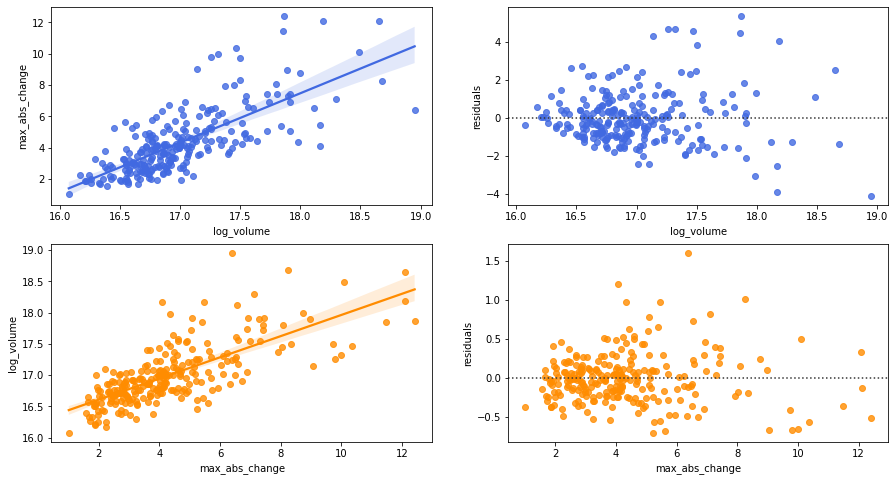

In [44]:
reg_resid_plots(fb_reg_data)

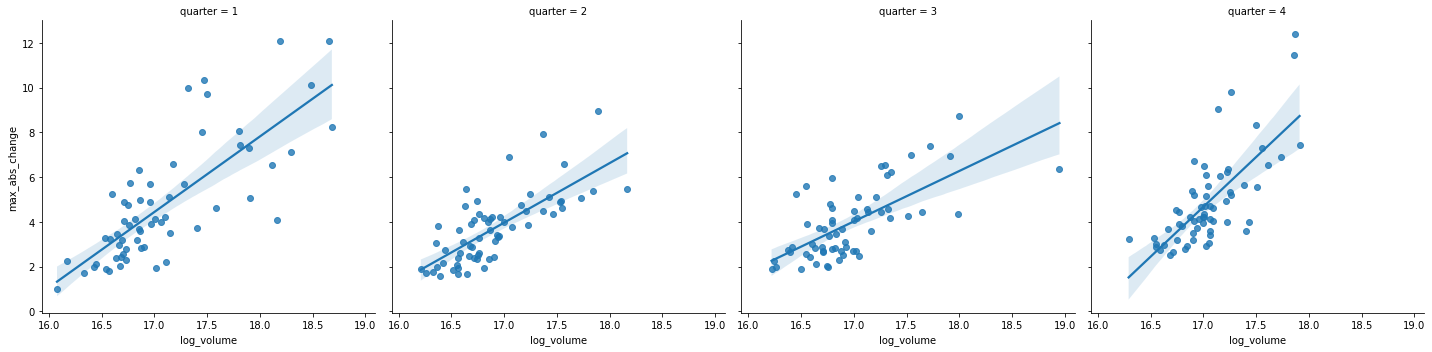

In [45]:
sns.lmplot(
    x='log_volume',
    y='max_abs_change', 
    col='quarter', 
    data=fb.assign(
        log_volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    )
)

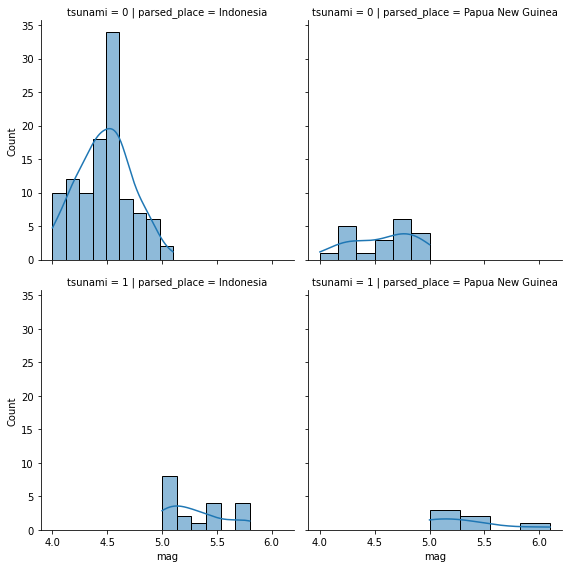

In [53]:
g = sns.FacetGrid(
    quakes.query(
    'parsed_place.isin('
    '["Indonesia", "Papua New Guinea"]) '
    'and magType == "mb"'
    ),
    row='tsunami',
    col='parsed_place',
    height=4
    )

g = g.map(sns.histplot, 'mag', kde=True)

In [54]:
covid = pd.read_csv('covid19_cases.csv').assign(date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')).set_index('date').replace('United_States_of_America', 'USA').sort_index()['2020-01-18':'2020-09-18']


Text(0, 0.5, 'price ($)')

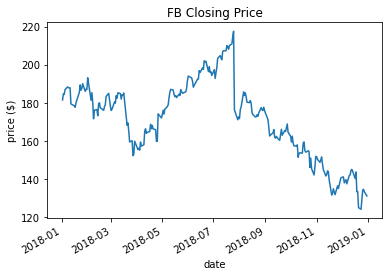

In [55]:
fb.close.plot()
plt.title('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

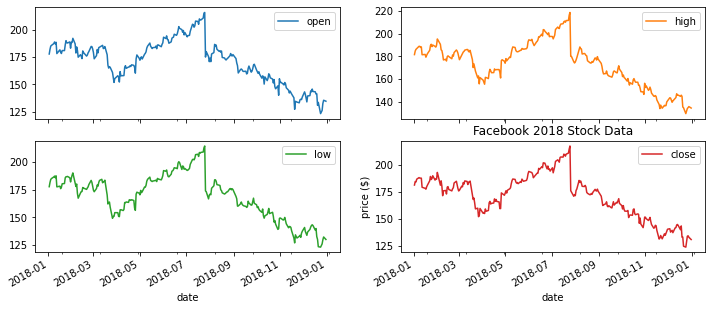

In [59]:
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.ylabel('price ($)')

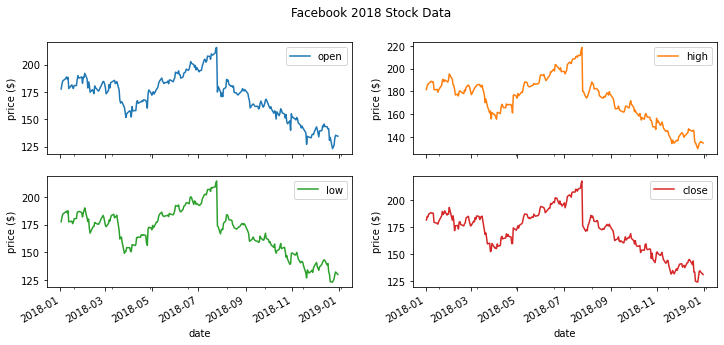

In [60]:
axes = fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
for ax in axes.flatten():
    ax.set_ylabel('price ($)')

Text(0, 0.5, 'price ($)')

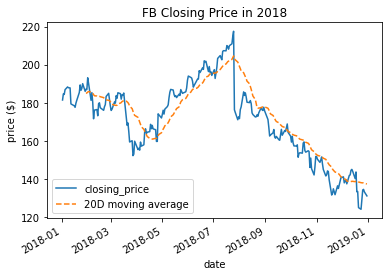

In [61]:
fb.assign(ma=lambda x: x.close.rolling(20).mean()).plot(y=['close', 'ma'], title='FB Closing Price in 2018', label=['closing_price', '20D moving average'], style=['-', '--'])
plt.legend(loc='lower left')
plt.ylabel('price ($)')

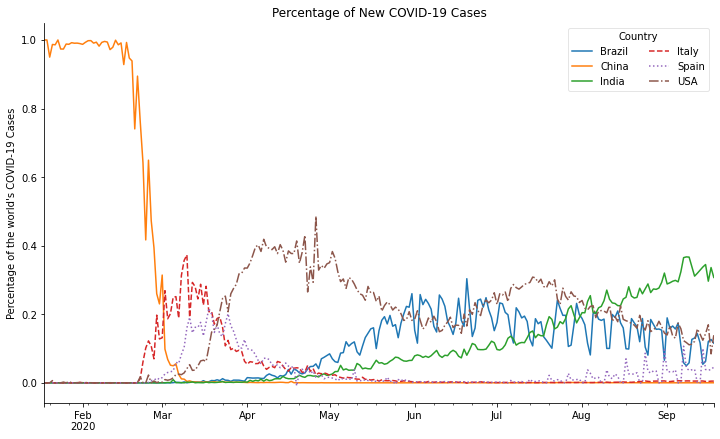

In [66]:
new_cases = covid.reset_index().pivot(index='date', columns='countriesAndTerritories', values='cases').fillna(0)

pct_new_cases = new_cases.apply(lambda x: x / new_cases.apply('sum', axis=1), axis=0)[['Italy', 'China', 'Spain', 'USA', 'India', 'Brazil']].sort_index(axis=1).fillna(0)

ax = pct_new_cases.plot(
    figsize=(12, 7), 
    style=['-'] * 3 + ['--', ':', '-.'], 
    title='Percentage of New COVID-19 Cases')

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the world\'s COVID-19 Cases')
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

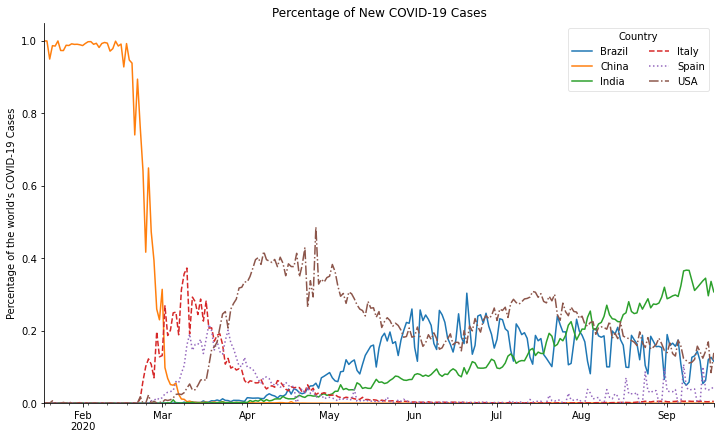

In [67]:
ax = pct_new_cases.plot(
    figsize=(12, 7), 
    style=['-'] * 3 + ['--', ':', '-.'], 
    title='Percentage of New COVID-19 Cases')

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the world\'s COVID-19 Cases')
ax.set_ylim(0, None)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

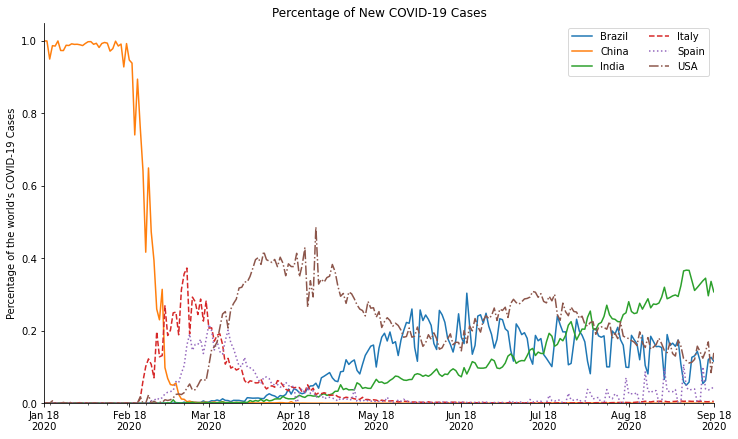

In [69]:
ax = pct_new_cases.plot(
    figsize=(12, 7), 
    style=['-'] * 3 + ['--', ':', '-.'], 
    title='Percentage of New COVID-19 Cases')

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=0.75, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the world\'s COVID-19 Cases')
ax.set_ylim(0, None)
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

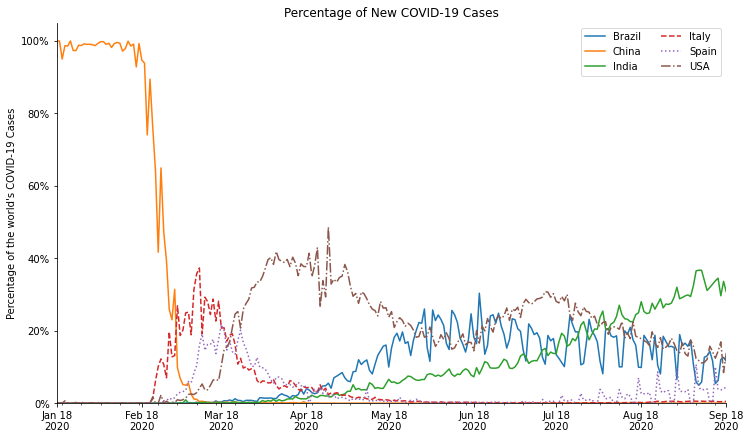

In [70]:
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7), 
    style=['-'] * 3 + ['--', ':', '-.'], 
    title='Percentage of New COVID-19 Cases')

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=0.75, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('Percentage of the world\'s COVID-19 Cases')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

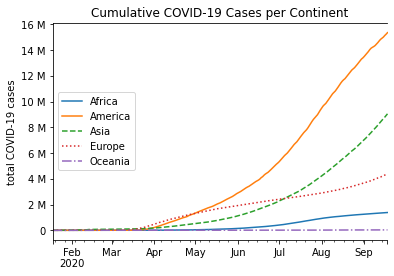

In [72]:
from matplotlib.ticker import EngFormatter

ax = covid.query('continentExp != "Other"').groupby(['continentExp', pd.Grouper(freq='1D')]).cases.sum().unstack(0).apply('cumsum').plot(style=['-', '-', '--', ':', '-.'], title='Cumulative COVID-19 Cases per Continent')

ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spin in ['top', 'right']:
    ax.spines[spine].set_visible(False)

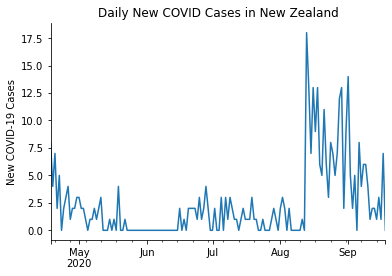

In [74]:
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(title='Daily New COVID Cases in New Zealand')
ax.set(xlabel='', ylabel='New COVID-19 Cases')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

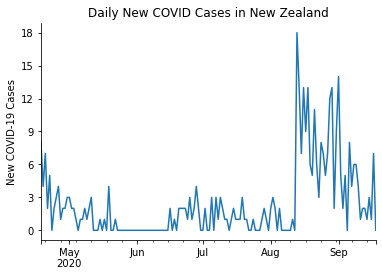

In [76]:
from matplotlib.ticker import MultipleLocator

ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(title='Daily New COVID Cases in New Zealand')
ax.set(xlabel='', ylabel='New COVID-19 Cases')
ax.yaxis.set_major_locator(MultipleLocator(base=3))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)


In [77]:
import itertools

def std_from_mean_kde(data):
    mean_mag, std_mean = data.mean(), data.std()

    ax = data.plot(kind='kde')
    ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')

    colors = ['green', 'orange', 'red']
    multipliers = [1, 2, 3]
    signs = ['-', '+']
    linestyles = [':', '-.', '--']
    
    for sign, (color, multiplier, style) in itertools.product(signs, zip(colors, multipliers, linestyles)):
        adjustment = multiplier * std_mean
        if sign == '-':
            value = mean_mag - adjustment
            label = '{} {}{}{}'.format(r'$\mu$', r'$\pm$', multiplier, r'$\sigma$') 
        else:
            value = mean_mag + adjustment
            label = None
        ax.axvline(value, color=color, linestyle=style, label=label, alpha=0.5)
    
    ax.legend()
    return(ax)

In [78]:
def std_from_mean_kde(data):
    """
    Plot the KDE along with vertical reference lines
    for each standard deviation from the mean.
    
    Parameters:
        - data: `pandas.Series` with numeric data
    
    Returns:
        Matplotlib `Axes` object.
    """
    mean_mag, std_mean = data.mean(), data.std()
    
    ax = data.plot(kind='kde')
    ax.axvline(mean_mag, color='b', alpha=0.2, label='mean')
    
    colors = ['green', 'orange', 'red']
    multipliers = [1, 2, 3]
    signs = ['-', '+']
    linestyles = [':', '-.', '--']
    
    for sign, (color, multiplier, style) in itertools.product(
        signs, zip(colors, multipliers, linestyles)
    ):
        adjustment = multiplier * std_mean
        if sign == '-':
            value = mean_mag - adjustment
            label = '{} {}{}{}'.format(
                r'$\mu$',
                r'$\pm$',
                multiplier,
                r'$\sigma$'
            )
        else:
            value = mean_mag + adjustment
            label = None
        ax.axvline(value, color=color, linestyle=style, label=label, alpha=0.5)
    
    ax.legend()
    return ax

Text(0.5, 0, 'mb earthquake magnitude')

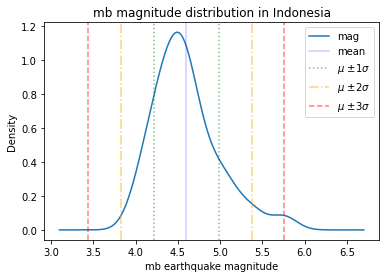

In [81]:
ax = std_from_mean_kde(quakes.query('magType == "mb" and parsed_place == "Indonesia"').mag)
ax.set_title('mb magnitude distribution in Indonesia')
ax.set_xlabel('mb earthquake magnitude')

Text(0.5, 1.0, 'FB differential between high and low price Q4 2018')

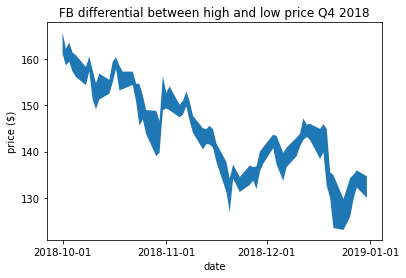

In [91]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low)
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')

Text(0.5, 1.0, 'FB Differential b/t High and Low Price Q4 2018')

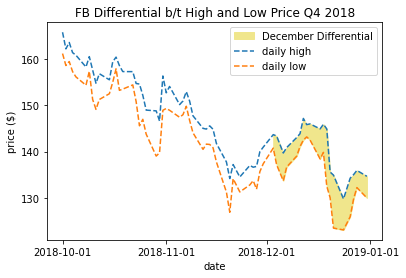

In [92]:
fb_q4 = fb.loc['2018-Q4']
plt.fill_between(fb_q4.index, fb_q4.high, fb_q4.low, where=fb_q4.index.month==12, color='khaki', label='December Differential')

plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.legend()
plt.title('FB Differential b/t High and Low Price Q4 2018')


Text(0, 0.5, 'price ($)')

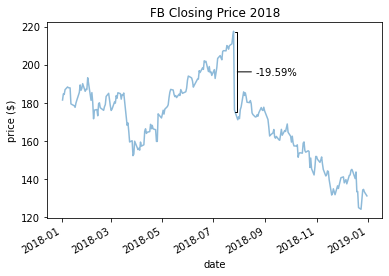

In [95]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
pct_drop = (open_price - close_price) / close_price
fb.close.plot(title='FB Closing Price 2018', alpha=0.5)
plt.annotate(
    f'{pct_drop: .2%}', va='center',
    xy=('2018-07-27', (open_price + close_price)/2),
    xytext=('2018-08-20', (open_price + close_price) / 2),
    arrowprops=dict(arrowstyle='-[,widthB=4.0, lengthB=0.2')
)
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

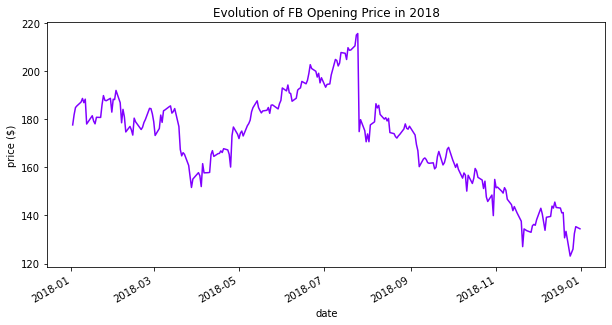

In [96]:
fb.plot(
    y='open',
    figsize=(10, 5),
    color='#8000FF',
    legend=False,
    title="Evolution of FB Opening Price in 2018"
)
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

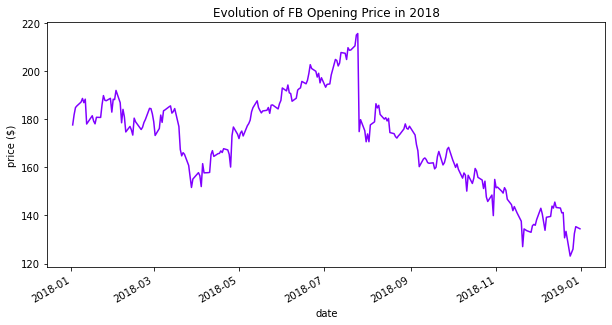

In [97]:
fb.plot(
    y='open',
    figsize=(10, 5),
    color=(128/255, 0, 1),
    legend=False,
    title="Evolution of FB Opening Price in 2018"
)
plt.ylabel('price ($)')

In [98]:
from matplotlib import cm
cm.datad.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'])

Text(0, 0.5, 'price ($)')

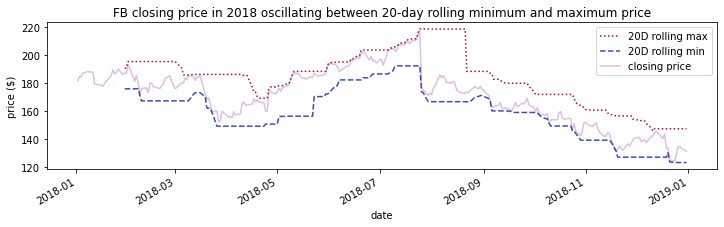

In [102]:
ax = fb.assign(
    rolling_min=lambda x: x.low.rolling(20).min(),
    rolling_max=lambda x: x.high.rolling(20).max()).plot(
        y=['rolling_max', 'rolling_min'],
        colormap='coolwarm_r',
        label=['20D rolling max', '20D rolling min'],
        style=[':', '--'],
        figsize=(12, 3),
        title='FB closing price in 2018 oscillating between ''20-day rolling minimum and maximum price')

ax.plot(fb.close, 'purple', alpha=0.25, label='closing price')
plt.legend()
plt.ylabel('price ($)')

In [103]:
cm.get_cmap('ocean')(.5)

(0.0, 0.2529411764705882, 0.5019607843137255, 1.0)

In [104]:
import color_utils

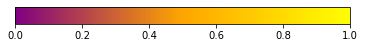

In [105]:
my_colors = ['#800080', '#FFA500', '#FFFF00']
rgbs = color_utils.hex_to_rgb_color_list(my_colors)
my_cmap = color_utils.blended_cmap(rgbs)
color_utils.draw_cmap(my_cmap, orientation='horizontal')

In [106]:
import itertools
colors = itertools.cycle(['#ffffff', '#f0f0f0', '#000000'])
print(colors)
print(next(colors))

#ffffff


[Text(0.5, 0, 'week number'), Text(0, 0.5, 'volume traded')]

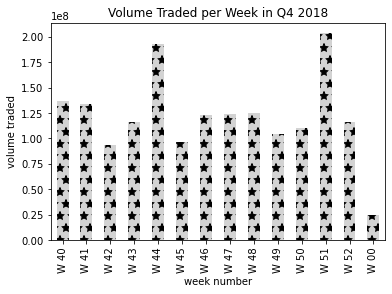

In [109]:
weekly_volume_traded = fb.loc['2018-Q4'].groupby(pd.Grouper(freq='W')).volume.sum()
weekly_volume_traded.index = weekly_volume_traded.index.strftime('W %W')

ax = weekly_volume_traded.plot(kind='bar', hatch='*', color='lightgray', title='Volume Traded per Week in Q4 2018')
ax.set(xlabel='week number', ylabel='volume traded')

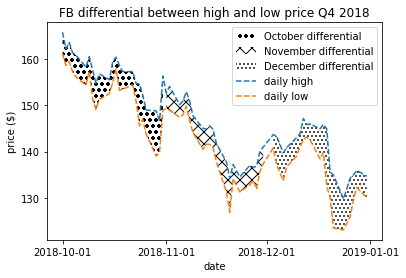

In [110]:
import calendar
fb_q4 = fb.loc['2018-Q4']
for texture, month in zip(
    ['oo', '/\\/\\', '...'], [10, 11, 12]
    ):
    plt.fill_between(
    fb_q4.index, fb_q4.high, fb_q4.low,
    hatch=texture, facecolor='white',
    where=fb_q4.index.month == month,
    label=f'{calendar.month_name[month]} differential'
    )

plt.plot(fb_q4.index, fb_q4.high, '--', label='daily high')
plt.plot(fb_q4.index, fb_q4.low, '--', label='daily low')
plt.xticks(['2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'])
plt.xlabel('date')
plt.ylabel('price ($)')
plt.title('FB differential between high and low price Q4 2018')
plt.legend()